<a href="https://colab.research.google.com/github/pavithraaanetizen/Predicting-customer-churn/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

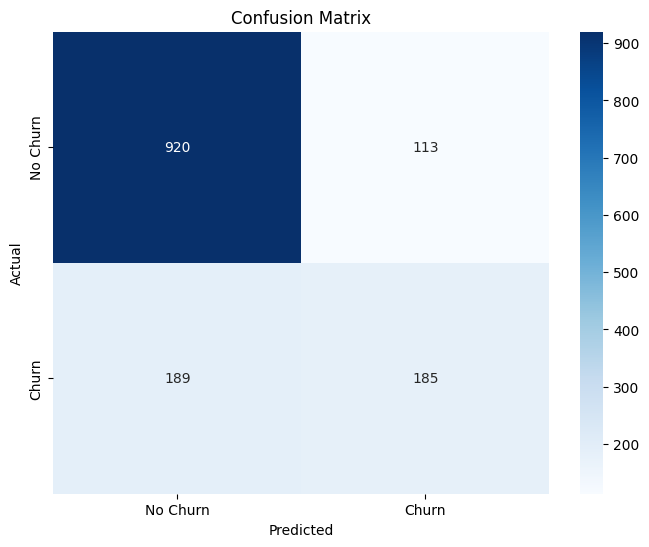

(array([[920, 113],
        [189, 185]]),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86      1033\n           1       0.62      0.49      0.55       374\n\n    accuracy                           0.79      1407\n   macro avg       0.73      0.69      0.70      1407\nweighted avg       0.77      0.79      0.78      1407\n')

In [2]:
# Reimport libraries and process again

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset directly from the GitHub repository
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Drop the customerID column as it is not needed
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (errors='coerce' ensures invalid values are set as NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables using LabelEncoder
for column in df.select_dtypes(include='object').columns:
    if column != 'Churn':  # Don't encode the target variable
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Encode the target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation - Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the confusion matrix and classification report
conf_matrix, class_report